# Challenge 3.1 # 


Importons la librairie qui nous sera utile:

In [1]:
%matplotlib inline
import numpy
from matplotlib import pyplot
from matplotlib import animation
import matplotlib.cm as cm
from JSAnimation.IPython_display import display_animation

 $$α=\frac{J}{k_bT}$$

Challenge: Check that this is not a coincidence and try again for different lattice configurations. You may use the following routine to generate different ones with random initial dipole orientations

In [79]:
def initial_state(nx,ny):
    """ Creates a lattice with random spin orientations
   
    Parameters:
    ----------
    nx   : int
        Discretization points in x
    ny   : int
        Discretization points in y
   
    Returns:
    -------
    r: 2D array of spins
    """
       
    # Uniform random spins between 0 and 1  
    r = numpy.random.random_integers(0,1,(nx,ny))
    
    # Where r=0, we assign a negative spin
    r[r==0] =-1

    return r

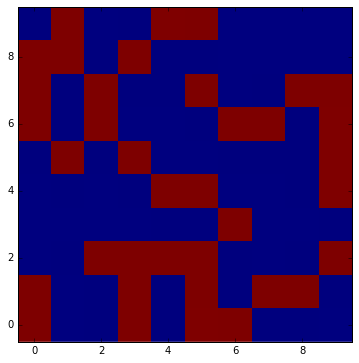

In [80]:
nx=10
ny=10

# Non-dimensional coupling constant J/(kb*T)
alpha = 0.1

# Initial spins at each site
sp = initial_state(10,10)

pyplot.figure(figsize=(6,6))
pyplot.imshow(sp,interpolation='none',origin='lower')

In [81]:
def energy_at_site(sp,alpha,sigma,ix,iy):
    """ Computes the contribution to the energy for a given spin
    at location ix,iy for a lattice with periodic boundary conditions
   
    Parameters:
    ----------
    sp: numpy array
        array of spins
    alpha  : real
        coupling constant J/(kb*T)
    sigma   : int
        spin at site ix,iy
    ix   : int
        location in x
    iy   : int
        location in y
    
   
    Returns:
    -------
    energy: energy for the given configuration
    """
    
    energy=-alpha*sigma*(sp[(ix-1)%nx,iy]+sp[(ix+1)%nx,iy]+sp[ix,(iy-1)%ny]+sp[ix,(iy+1)%ny])

    return energy

In [82]:
print(energy_at_site(sp,alpha,-1,5,5))
print(energy_at_site(sp,alpha,1,5,5))


print (numpy.exp(-(energy_at_site(sp,alpha,1,5,5)-energy_at_site(sp,alpha,-1,5,5))))

-0.2
0.2
0.670320046036


In [83]:
def metropolis_at_site(sp,alpha,ix,iy):
    """ Flips a dipole at site ix, iy when probability condition is met 
   
    Parameters:
    ----------
    sp: numpy array
        array of spins
    alpha  : real
        coupling constant J/(kb*T)
    ix   : int
        location in x
    iy   : int
        location in y
    """
    sigma=sp[ix,iy]
    energy_before_flip = energy_at_site(sp,alpha,sigma,ix,iy)
    sigma = -sigma
    energy_if_site_flipped = energy_at_site(sp,alpha,sigma,ix,iy)
    
    # Flip the site with Metropolis probability
    # Condition is always satisifed if dE < 0
    if (numpy.random.random_sample()<numpy.exp(-(energy_if_site_flipped \
                                               -energy_before_flip))):
        sp[ix,iy]=-sp[ix,iy]

In [84]:
NMC = 100000
states = numpy.empty(NMC+1)
states[0]=sp[5,5]

for n in range(0,NMC):
    metropolis_at_site(sp,alpha,5,5)
    states[n]=sp[5,5]

ups = numpy.extract(states==1, states).size
downs = NMC - ups
print(ups/downs)

0.6668333500016669


On est contant !!  On peu réinitialiser les cellules, et nous trouverons à chaque foie des résultats concordants.

## Challenge 3.1


In [66]:
nx = 100
ny = 100
sp = numpy.ones ((nx,ny))

ix=50
iy=50

NMC = 100



Il faut faire vairer alpha etre  0 et 1

In [67]:
alpha=numpy.linspace(0,1,1000)

Définissons nos fonctions:

In [68]:
def energie(sp,alpha,sigma,ix,iy):

    nx,ny=sp.shape
    energie=-alpha*sigma*(sp[(ix-1)%nx,iy]+sp[(ix+1)%nx,iy]+sp[ix,(iy-1)%ny]+sp[ix,(iy+1)%ny])

    return energie

In [69]:
def metropolis(sp,alpha,ix,iy):

    sigma=sp[ix,iy]
    energy_before_flip = energie(sp,alpha,sigma,ix,iy) #energy before splitting
    sigma = -sigma
    energy_if_site_flipped = energie(sp,alpha,sigma,ix,iy) #energy after splitting
    
    if (numpy.random.random_sample()<numpy.exp(-(energy_if_site_flipped \
                                               -energy_before_flip))):
        sp[ix,iy]=-sp[ix,iy]

In [70]:

def metropolisNMC(sp, NMC, nx, ny, alpha):

    states = numpy.empty([NMC+1,nx,ny])
    states[0] = sp.copy()
    
    for i in range(1,NMC+1):
        for j in range(0,nx*ny):
            ix=numpy.random.random_integers(0,nx-1)
            iy=numpy.random.random_integers(0,ny-1)
            metropolis(sp,alpha,ix,iy)
        states[i]=sp.copy()
    return states

Faisons la moyenne de l'énergie et de la magnétisation sur le nombre d'itération.


In [71]:
def energiek(statesk,alpha):
    em=numpy.empty_like(statesk) #énergie moyenne
    nx,ny=em.shape
    for ix in range(nx):
        for iy in range(ny):
            sigma=statesk[ix,iy]
            EM[ix,iy]=Ecel_1(statesk.copy(),alpha,sigma,ix,iy) #.copy()?
    return numpy.sum(em)

In [72]:
def enegiemoyenne(states,alpha):
    EM=0
    for i in range(len(states)):
        EM+=energiek(etats[i],alpha)
    EM=(len(states))
    return EM

In [73]:
def magnetisationmoyenne(states):
    MM=0
    for i in range(len(states)):
        MM+=numpy.sum(states[i])
    MM/=(len(states))
    return MM

Energie et magnetisation moyenne en fonction de alpha:

In [74]:
def En(NMC,nx,ny,alpha,sp):
    states_E= metropolisNMC(sp.copy(), NMC, nx, ny, alpha)
    E=energiemoyenne(states_E.copy(),alpha)
    return E


def Ma(NMC,nx,ny,alpha,sp):
    states_M= metropolisNMC(sp.copy(), NMC, nx, ny, alpha)
    M=magnetisationmoyenne(states_M.copy())
    return M


Maintenant que nous avons défini tout ce dont nous avions besoin, passons à l'application numerique:

In [75]:
#numpty.empty_like: Return a new array with the same shape and type as a given array.

ENERGIE=numpy.empty_like(alpha) 
MAGETISATION=numpy.empty_like(alpha)

for l in range(len(En(NMC,nx,ny,alpha,sp))):
    ENERGIE[l]=En(NMC,nx,ny,alpha[l],sp.copy())
    MAGNETISATION[l]=Ma(NMC,nx,ny,alpha[l],sp.copy())

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

Ca ne marche pas mais je n'arrive pas à résoudre le problème.  C'est un problème lié à la condition qui est ambigue, pourtant même si je fixe tout mes paramettres elle reste ambigue !

Il ne reste plus que à faire un graphique de mes energie moyenne et magnétisation moyenne en fonction de alpha.

NameError: name 'MAGNETISATION' is not defined

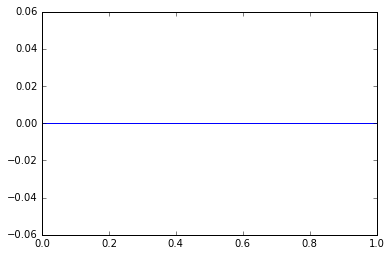

In [78]:
pyplot.plot(alpha,ENERGIE)
pyplot.plot(alpha,MAGNETISATION)

Solution exacte de Onsager: